# Nama      : Brian Mohamad Safiudin
# NIM       : 2141720133
# Kelas     : TI - 3F

---
# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

---
## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!
---

# Import library yang diinginkan
---

In [1]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Mendapatkan dataset MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

# Mengambil data dan target dari dataset MNIST
X, y = mnist.data, mnist.target

c:\Users\user\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

---
# 1. Cek Data Imbalance
---

Label 0: 6903 data points
Label 1: 7877 data points
Label 2: 6990 data points
Label 3: 7141 data points
Label 4: 6824 data points
Label 5: 6313 data points
Label 6: 6876 data points
Label 7: 7293 data points
Label 8: 6825 data points
Label 9: 6958 data points


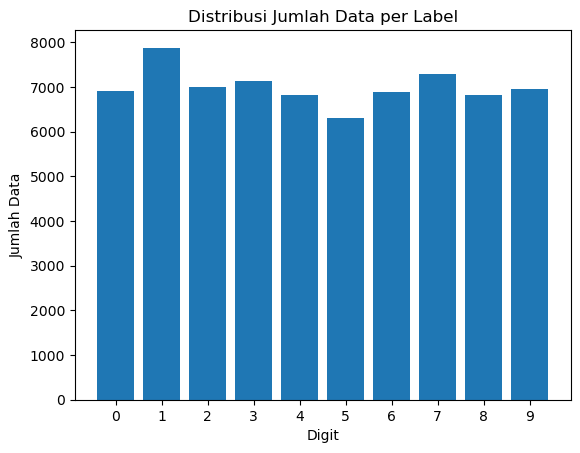

In [3]:
label_counts = np.bincount(y.astype(int))
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data points")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10))
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.show()

---
# 2. Menampilkan 15 Citra Pertama
---

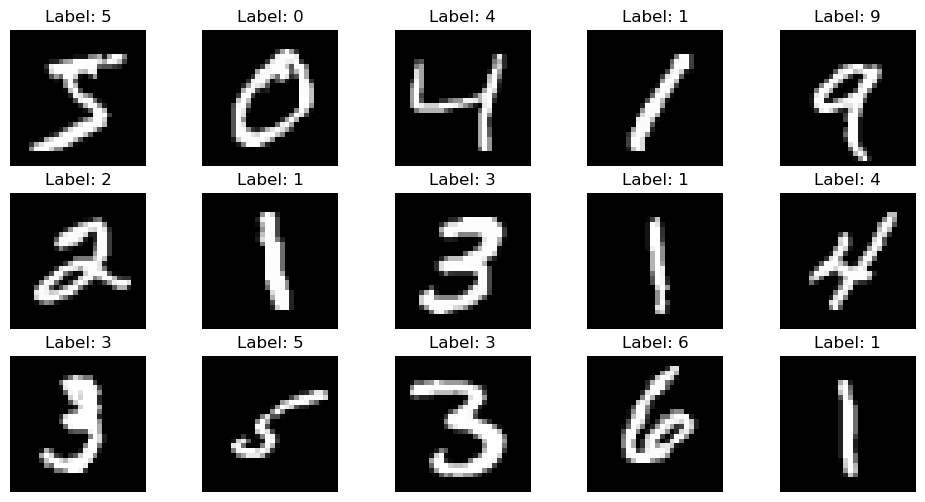

In [4]:
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

In [5]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Mencetak 10 nilai pertama dari X_scaled
print("10 nilai pertama dari X_scaled:")
print(X_scaled[:10, :])

10 nilai pertama dari X_scaled:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


---
# 3. Ekstraksi Fitur PCA
---

In [8]:
pca = PCA(n_components=50)  # Ganti jumlah komponen sesuai kebutuhan
X_pca = pca.fit_transform(X_scaled)

---
# 4. Data training dan data testing menggunakan rasio 70:30
---

In [9]:
# Pembagian Data Training dan Testing 70:30
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

---
# 5. Klasifikasi dengan Naive Bayes Gaussian dan SVM
---

In [10]:
# Klasifikasi dengan Naive Bayes Gaussian
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [11]:
# Klasifikasi dengan SVM
# Inisialisasi model SVM dengan kernel linear dan parameter C serta gamma yang diatur
svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
# Melatih model pada data training
svm_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

---
# 6. Evaluasi Model
---

In [12]:
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [13]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.8718571428571429 = 87.19%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4845
           1       0.96      0.94      0.95      5513
           2       0.83      0.85      0.84      4857
           3       0.84      0.83      0.84      4965
           4       0.86      0.86      0.86      4888
           5       0.77      0.84      0.80      4398
           6       0.92      0.92      0.92      4788
           7       0.92      0.86      0.89      5045
           8       0.83      0.84      0.84      4833
           9       0.82      0.83      0.83      4868

    accuracy                           0.87     49000
   macro avg       0.87      0.87      0.87     49000
weighted avg       0.87      0.87      0.87     49000

Naive Bayes (Training) Confusion Matrix:
[[4519    0   45   47    5  135   73    6   10    5]
 [   0 5160  101   24    8   77   30   2

---
# 7. Citra data testing berserta hasil pelabelannya
---

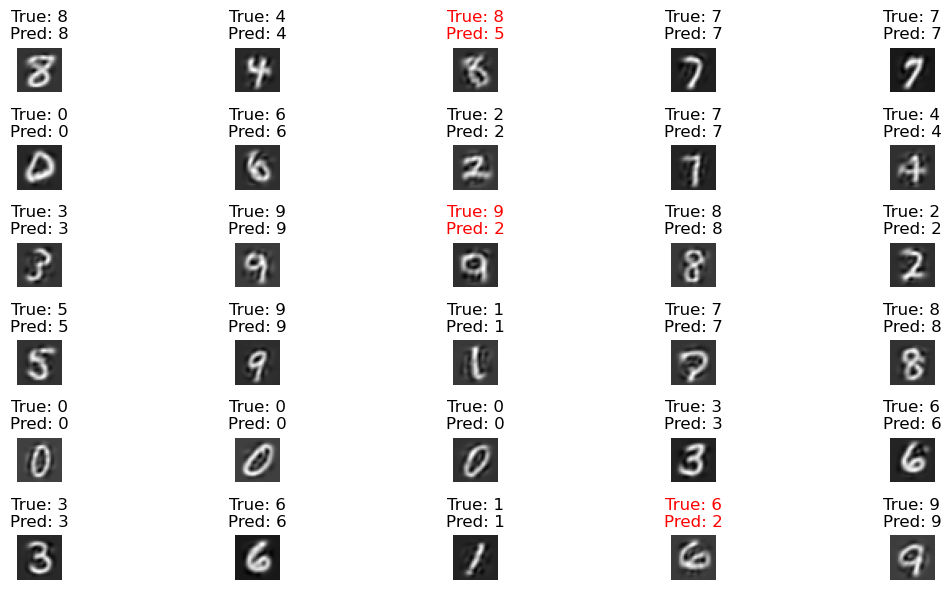

In [14]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [15]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.9394897959183673 = 93.95%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4845
           1       0.96      0.99      0.97      5513
           2       0.92      0.93      0.93      4857
           3       0.91      0.91      0.91      4965
           4       0.94      0.95      0.95      4888
           5       0.90      0.89      0.90      4398
           6       0.96      0.96      0.96      4788
           7       0.95      0.95      0.95      5045
           8       0.93      0.90      0.92      4833
           9       0.93      0.91      0.92      4868

    accuracy                           0.94     49000
   macro avg       0.94      0.94      0.94     49000
weighted avg       0.94      0.94      0.94     49000

SVM (Training) Confusion Matrix:
[[4763    0   14    8    7   28   12    0   12    1]
 [   1 5432   16   11    3    8    1    9   27    5]
 [  24   22

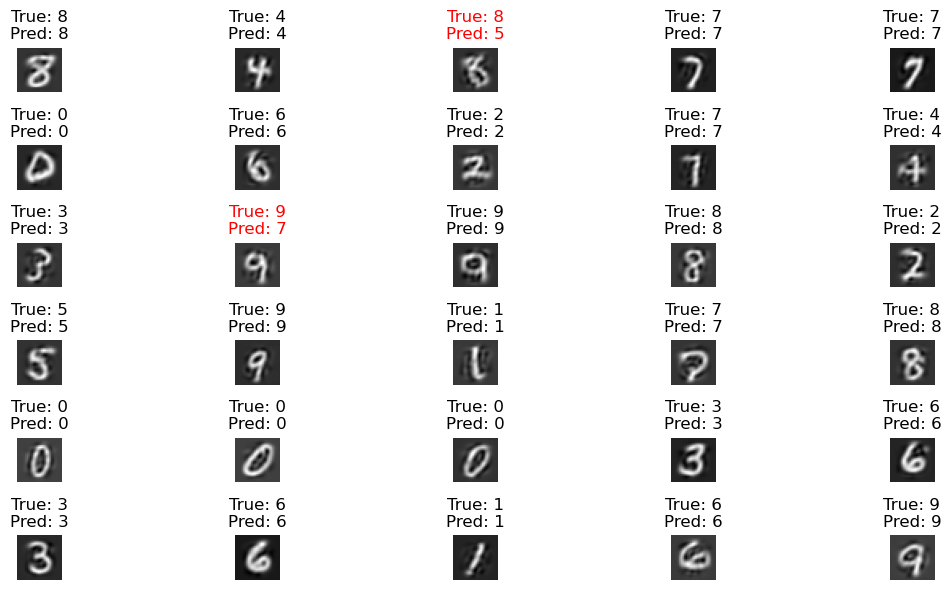

In [16]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

## data training dan data testing menggunakan rasio 80:20

In [17]:
# Pembagian Data Training dan Testing 80:20
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [18]:
# Klasifikasi dengan Naive Bayes Gaussian
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [19]:
# Klasifikasi dengan SVM
# Inisialisasi model SVM dengan kernel linear dan parameter C serta gamma yang diatur
svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
# Melatih model pada data training
svm_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

In [20]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [21]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.8715892857142857 = 87.16%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5560
           1       0.96      0.94      0.95      6277
           2       0.83      0.85      0.84      5610
           3       0.84      0.83      0.84      5708
           4       0.86      0.86      0.86      5529
           5       0.77      0.84      0.80      5040
           6       0.92      0.92      0.92      5480
           7       0.92      0.86      0.89      5790
           8       0.83      0.84      0.84      5468
           9       0.82      0.83      0.83      5538

    accuracy                           0.87     56000
   macro avg       0.87      0.87      0.87     56000
weighted avg       0.87      0.87      0.87     56000

Naive Bayes (Training) Confusion Matrix:
[[5183    0   51   54    4  160   84    8   10    6]
 [   0 5882  116   27    8   91   29   3

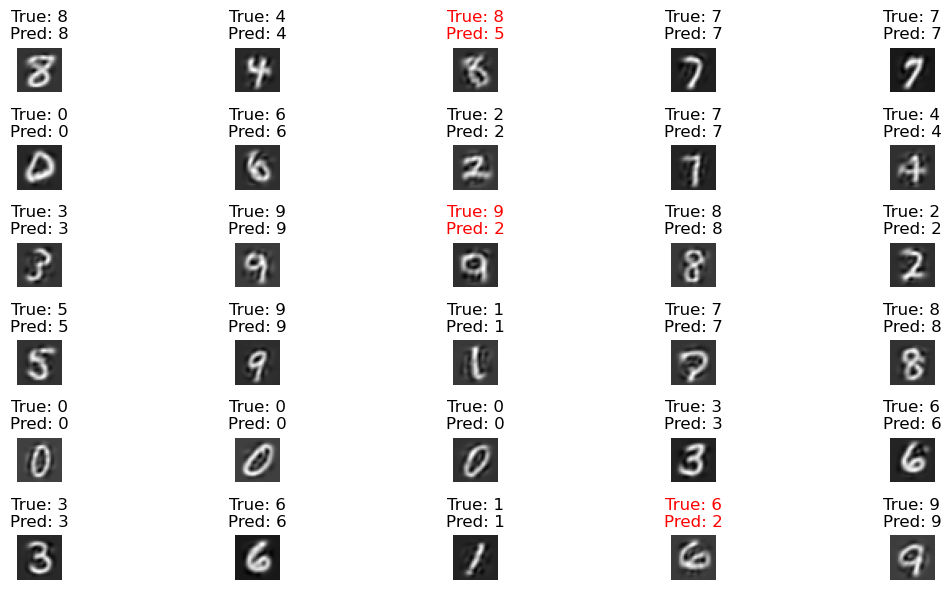

In [22]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [23]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.9380714285714286 = 93.81%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5560
           1       0.97      0.98      0.97      6277
           2       0.92      0.93      0.93      5610
           3       0.91      0.91      0.91      5708
           4       0.93      0.95      0.94      5529
           5       0.89      0.89      0.89      5040
           6       0.96      0.96      0.96      5480
           7       0.95      0.95      0.95      5790
           8       0.93      0.90      0.91      5468
           9       0.94      0.90      0.92      5538

    accuracy                           0.94     56000
   macro avg       0.94      0.94      0.94     56000
weighted avg       0.94      0.94      0.94     56000

SVM (Training) Confusion Matrix:
[[5451    0   16   11    8   42   14    2   14    2]
 [   1 6178   20   14    5    6    1   11   34    7]
 [  29   26

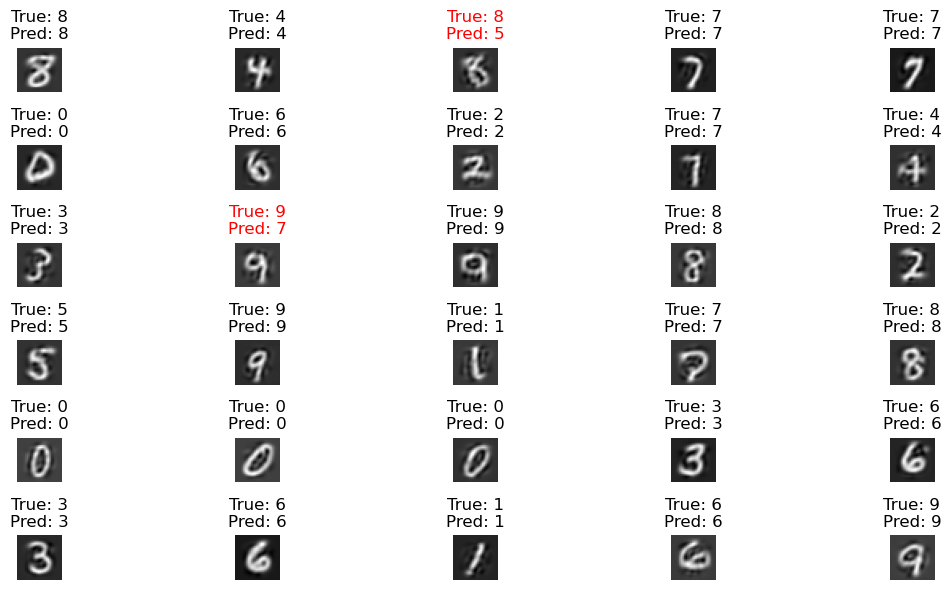

In [24]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

## data training dan data testing menggunakan rasio 90:10

In [25]:
# Pembagian Data Training dan Testing 80:20
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

In [26]:
# Klasifikasi dengan Naive Bayes Gaussian
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [27]:
# Klasifikasi dengan SVM
# Inisialisasi model SVM dengan kernel linear dan parameter C serta gamma yang diatur
svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
# Melatih model pada data training
svm_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

In [28]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [29]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.8722222222222222 = 87.22%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6220
           1       0.96      0.94      0.95      7077
           2       0.83      0.85      0.84      6316
           3       0.84      0.83      0.84      6381
           4       0.86      0.86      0.86      6213
           5       0.77      0.84      0.80      5655
           6       0.92      0.92      0.92      6199
           7       0.92      0.87      0.89      6569
           8       0.83      0.84      0.84      6132
           9       0.82      0.83      0.83      6238

    accuracy                           0.87     63000
   macro avg       0.87      0.87      0.87     63000
weighted avg       0.87      0.87      0.87     63000

Naive Bayes (Training) Confusion Matrix:
[[5811    0   52   51    6  176   94   10   13    7]
 [   0 6629  132   34    9  102   32   3

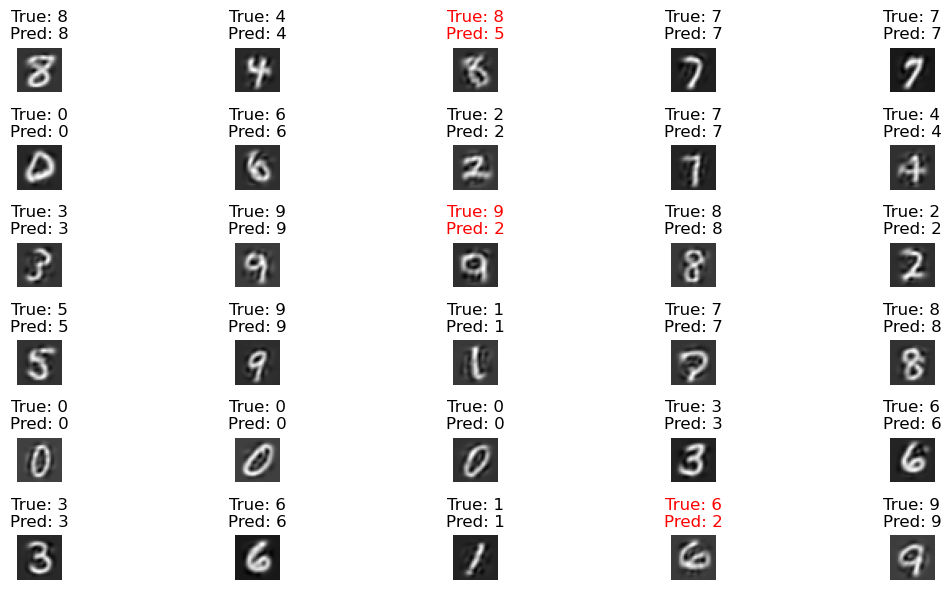

In [30]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [31]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.9383492063492064 = 93.83%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6220
           1       0.97      0.99      0.98      7077
           2       0.92      0.93      0.93      6316
           3       0.91      0.91      0.91      6381
           4       0.93      0.95      0.94      6213
           5       0.90      0.90      0.90      5655
           6       0.96      0.96      0.96      6199
           7       0.95      0.95      0.95      6569
           8       0.93      0.90      0.92      6132
           9       0.93      0.90      0.92      6238

    accuracy                           0.94     63000
   macro avg       0.94      0.94      0.94     63000
weighted avg       0.94      0.94      0.94     63000

SVM (Training) Confusion Matrix:
[[6094    1   18   14   10   42   19    2   18    2]
 [   0 6972   20   15    4    6    2   11   40    7]
 [  33   26

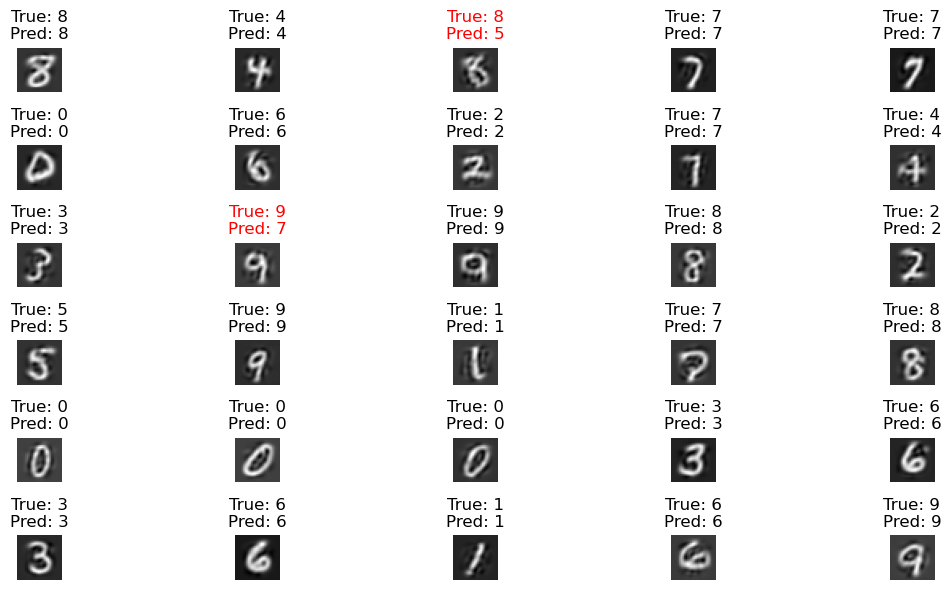

In [32]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

---
# 8. Kesimpulan
---

# Naive Bayes:

## 70:30

### Training Accuracy: 86.68%
### Testing Accuracy: 86.67%

## 80:20

### Training Accuracy: 87.17%
### Testing Accuracy: 87.14%

## 90:10

### Training Accuracy: 87.21%
### Testing Accuracy: 86.81%

---

# SVM:

## 70:30

### Training Accuracy: 93.70%
### Testing Accuracy: 93.25%

## 80:20

### Training Accuracy: 93.79%
### Testing Accuracy: 93.29%

## 90:10

### Training Accuracy: 93.83%
### Testing Accuracy: 92.94%

---

### Model SVM menunjukkan performa yang lebih baik dibandingkan Naive Bayes pada ketiga rasio dataset (70:30, 80:20, dan 90:10).

### Peningkatan akurasi dari dataset 70:30 hingga 90:10 menunjukkan bahwa SVM mampu mengatasi masalah overfitting yang mungkin terjadi pada dataset dengan rasio training yang lebih tinggi.

### Pada kasus ini, SVM adalah pilihan yang lebih baik dibandingkan Naive Bayes untuk melakukan klasifikasi pada dataset yang diberikan.